<a href="https://colab.research.google.com/github/JackQuane/C-Programs1/blob/master/Copy_of_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Assignment 2

Provide answers to the problems in the boxes provided.  

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
`Code` boxes take (and execute) `python` code.
`Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

Marks will be awarded for
participation and engagement.

When finished, print this notebook into a **pdf** file and submit this to
**blackboard**.

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github](https://github.com/gpfeiffer/cs4423) repository.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [0]:
import networkx as nx
import pandas as pd
from queue import Queue
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

## 1.  The Counties of Ireland.

Define a graph `I` on the $32$ counties of Ireland by
joining two counties whenever they have a common border.
(A list of counties and their borders in the adjacency list format
can be found on [github](https://github.com/gpfeiffer/cs4423/blob/master/data/ireland.adj):
check the data and let us know if you disagree!)

What is the order and the size of the resulting graph?

In terms of centrality measures, what are the $3$ most central counties, for
1.  degree centrality?
1.  eigenvector centrality?
1.  closeness centrality?
1.  betweenness centrality?



In [9]:
I= nx.Graph(["Antrim Armagh Derry Down Tyrone",
"Armagh Antrim Tyrone Down Monaghan Louth",
"Carlow Kildare Kilkenny Laois Wexford Wicklow",
"Cavan Fermanagh Leitrim Longford Meath Monaghan Westmeath",
"Clare Galway Kerry Limerick Tipperary",
"Cork Kerry Limerick Tipperary Waterford",
"Derry Antrim Donegal Tyrone",
"Donegal Derry Tyrone Fermanagh Leitrim",
"Down Antrim Armagh Louth",
"Dublin Kildare Meath Wicklow",
"Fermanagh Cavan Donegal Leitrim Monaghan Tyrone",
"Galway Clare Mayo Offaly Roscommon Tipperary",
"Kerry Clare Cork Limerick",
"Kildare Carlow Dublin Laois Meath Offaly Wicklow",
"Kilkenny Carlow Laois Tipperary Waterford Wexford",
"Laois Carlow Kildare Kilkenny Offaly Tipperary",
"Leitrim Cavan Donegal Fermanagh Longford Roscommon Sligo",
"Limerick Clare Cork Kerry Tipperary",
"Longford Cavan Leitrim Roscommon Westmeath",
"Louth Armagh Down Meath Monaghan",
"Mayo Galway Roscommon Sligo",
"Meath Cavan Dublin Kildare Louth Monaghan Offaly Westmeath",
"Monaghan Armagh Cavan Fermanagh Louth Meath Tyrone",
"Offaly Galway Kildare Laois Meath Roscommon Tipperary Westmeath",
"Roscommon Galway Leitrim Longford Mayo Offaly Sligo Westmeath",
"Sligo Leitrim Mayo Roscommon",
"Tipperary Clare Waterford Kilkenny Laois Offaly Galway Limerick Cork",
"Tyrone Antrim Armagh Derry Donegal Fermanagh Monaghan",
"Waterford Cork Kilkenny Tipperary Wexford",
"Westmeath Cavan Longford Meath Offaly Roscommon",
"Wexford Carlow Kilkenny Waterford Wicklow",
"Wicklow Carlow Dublin Kildare Wexford"])


SyntaxError: ignored

## 2.  Actions on Sets.

Recall the implementation of **permutations as tuples** ...

In [0]:
n = 4

def transposition(n, i):
    t = [k for k in range(n)]
    t[i], t[i+1] = t[i+1], t[i]
    return tuple(t)

gens = [transposition(n, k) for k in range(n-1)]

... and the **orbit algorithm** that creates the **action graph**:

In [0]:
def init_Q_G(x):
    Q = Queue()
    Q.put(x)
    G = nx.Graph()
    G.add_node(x)
    return Q, G

def action_graph(gens, x, action, equals):
    Q, G = init_Q_G(x)
    while not Q.empty():
        y = Q.get()
        for a in gens:
            z = action(a, y)
            w = next((v for v in G.nodes() if equals(v, z)), None)
            if w is None:
                Q.put(z)
                G.add_node(z)
                G.add_edge(y, z)
            else:
                G.add_edge(y, w)
    return G

Permutations act on subsets of $X = \{0, 1, \dots, n{-}1\}$ in such a way that, for any subset $Z \subseteq X$
and a permutation $f$ of $X$, the image of $Z$ under $f$ is determined as
$$
f(Z) = \{f(z) : z \in Z\},
$$
the image of the set is the set of the images. In `python`, using hashable `frozenset`s rather
than mutable `set`s, this action can be defined as

In [0]:
def on_sets(a, zzz):
    return frozenset(a[z] for z in zzz)

Trusting that equality of (frozen) sets can be tested with `python`'s ordinary equals operator, we again set

In [0]:
def eq(x, y):
    return x == y

Then we can compute and draw the action graph of the symmetric group $S_4$ acting on the 
$2$-subsets of $\{0,1,2,3\}$, using $x = \{0, 1\}$ as the initial vertex:

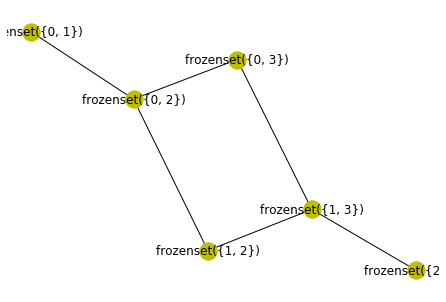

In [42]:
G = action_graph(gens, frozenset({0,1}), on_sets, eq)
nx.draw(G, **opts)

1. Compute and draw the action graph of $S_5$ acting on the $3$-subsets of $\{0,1,2,3,4\}$.
(You would need to define a new list `gens` of generators, and find a suitable $3$-set `x`
to compute the orbit of.  Everything else, the `action_graph` function, the action `on_sets`
and the equality test `eq` should still work.)

2. Compute and draw the action graph of $S_6$ acting on the $3$-subsets of $\{0,1,2,3,4,5\}$.

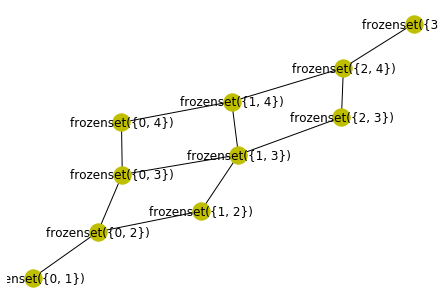

In [44]:
n = 5

gens = [transposition(n, k) for k in range(n-1)]\

G = action_graph(gens, frozenset({0,1}), on_sets, eq)
nx.draw(G, **opts)



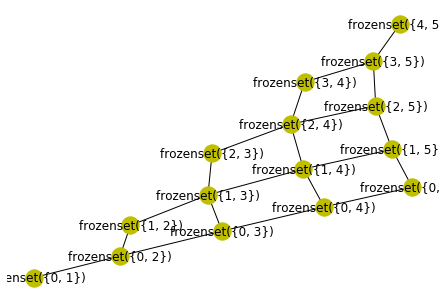

In [45]:
n = 6

gens = [transposition(n, k) for k in range(n-1)]\

G = action_graph(gens, frozenset({0,1}), on_sets, eq)
nx.draw(G, **opts)

## 3. Labelled vs. Unlabelled Trees

According to Cayley's formula, there are $n^{n-2}$ **labelled trees**
on the $n$-point vertex set $X = \{0, 1, 2, \dots, n{-}1\}$.

The **isomorphism types** of trees, aka **unlabelled trees** on $n$ vertices
are much harder to count: there is no closed formula for the number of unlabelled trees.

Using the concept of group actions, we have already determined the
**orbits** of the labelled trees on $4$ nodes under all permutations 
of those $4$ nodes.  As a result we have seen that there are (only) $2$
unlabelled trees on $4$ points, one orbit of length $4$ and one of length $12$,
accounting for a total of $4^{4-2} = 16$ labelled trees.

The same method yields unlabelled trees on more than $4$ points, as follows.
Recall the tools that have been used in the case $n = 4$.

* We have represented permutations on $n$ points as `python` tuples of length $n$,
in particular the transposition swapping points $i$ and $i{+}1$:

In [0]:
def transposition(n, i):
    t = list(range(n))
    t[i], t[i+1] = t[i+1], t[i]
    return tuple(t)

* We have checked equality of graphs by checking whether their node sets and their
edge sets are the same:

In [0]:
def is_subgraph(G, H):
    for x in G:
        if not H.has_node(x):
            return False
    for e in G.edges:
        if not H.has_edge(*e):
            return False
    return True 

def are_equal_as_graphs(G, H):
    return is_subgraph(G, H) and is_subgraph(H, G)

* We have set up a BFS over the implicit action graph
spanned by the action of the symmetric group as an **orbit algorithm**:

In [0]:
def orbit(gens, x, action, equals):
    xxx = [x]
    for y in xxx:
        for a in gens:
            z = action(a, y)
            w = next((v for v in xxx if equals(v, z)), None)
            if w is None:
                xxx.append(z)
    return xxx

* And we have formulated the relabelling of nodes as a group action:

In [0]:
def relabel(a, G):
    mapping = dict(enumerate(a))
    return nx.relabel_nodes(G, mapping)

* Finally, we'll use the [`is_isomorphic`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.isomorphism.is_isomorphic.html) function that `networkx` provides to
test isomorphism of graphs.

With all of this in place, we can systematically list all 
unlabelled trees on $n = 5$
nodes: 

* Start by setting `n` to $5$, listing the four generating transpositions
of the symmetric group $S_5$ as `swaps`, and initializing a list of `orbits`,
for now as an empty list:

In [0]:
n = 5
swaps = [transposition(n, k) for k in range(n-1)]
orbits = []

* Pick a random tree `t` on $n$ points and draw it:

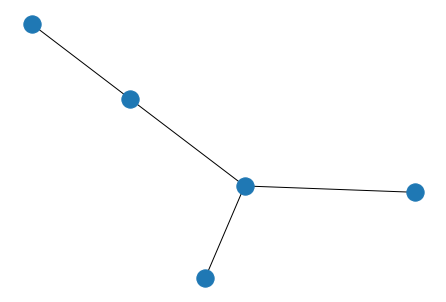

In [53]:
t = nx.random_tree(n)
nx.draw(t)

* Compute the orbit of `t` under the generating permutations `swaps`
  with respect to the `relabel` action, append the orbit to the list `orbits`
  and check its length:

In [54]:
orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

60

* Pick another random tree `t`; in case it is isomorphic to the old tree `t`
  (which now is `orbits[0][0]`) pick again, and keep picking until a tree `t` is
  found that's not isomorphic to the old one; draw `t` - it should have a different shape:

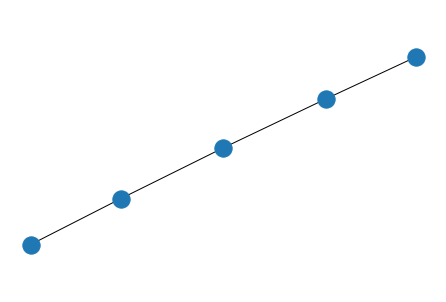

In [55]:
t = nx.random_tree(n)
while nx.is_isomorphic(t, orbits[0][0]):
    t = nx.random_tree(n)

nx.draw(t)

* Compute its orbit and append it to the list `orbits`:

In [56]:
orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

60

* How many labelled trees have we found so far?

In [57]:
sum(len(o) for o in orbits)

120

* That's less than $125$, so we keep searching by repeating the above steps - first
  keep picking random trees until one is found that is not isomorphic to 
  [**any**](https://docs.python.org/3/library/functions.html#any) of the previously found ones (which now are `o[0] for o in orbits`):

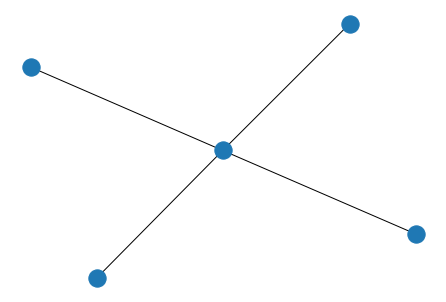

In [58]:
t = nx.random_tree(n)
while any(nx.is_isomorphic(t, o[0]) for o in orbits):
    t = nx.random_tree(n)

nx.draw(t)

* Then append its orbit to the list `orbits`:

In [59]:
orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

5

* Have we found them all?

In [60]:
sum(len(o) for o in orbits)

125

* Yes, all $125$!  So that's $3$ unlabelled trees on $5$ points, 
  with orbits of length $60$, $60$ and $5$.

**How many** unlabelled trees are there $n = 6$ points?  Enumerate the 
**orbits of labelled trees** on $6$ points as above, by following these steps:

1. Start by setting `n` to $6$, `swaps` to the list of $5$ generating transpositions
   of the symmetric group $S_6$, and `orbits` to the empty list.

2. Pick a random tree `t` and draw it.

3. Compute the orbit `orb` of `t` under the generating permutations `swaps`,
   append `orb` to the list `orbits` and check the length of `orb`.

4. Repeat the following steps until the sum of the orbit lengths in `orbits`
   equals $6^{6-2} = 1296$:
   
5. Keep picking random trees on $6$ points until a tree `t` is found that is not isomorphic to any of the previous ones, then draw `t` (is it a new shape?).

3. Compute the orbit `orb` of `t` under the generating permutations `swaps`,
   append `orb` to the list `orbits` and check the length of `orb`.

7. Check the sum of the orbit lengths in `orbit`.  STOP if the desired number is reached.

8. How many unlabelled trees on $6$ points did you find?

9. How big are their **automorphism groups**? (Use the Orbit-Stabilizer Theorem.)

360

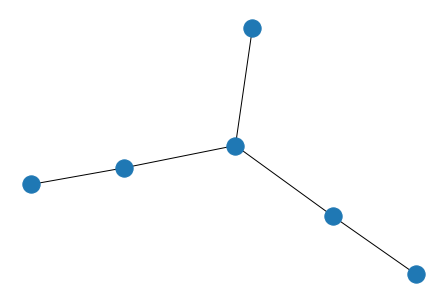

In [66]:
n = 6
swaps = [transposition(n, k) for k in range(n-1)]
orbits = []

t = nx.random_tree(n)
nx.draw(t)

orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)



810

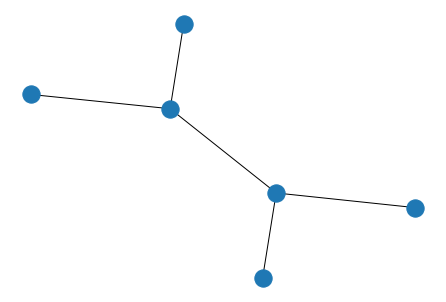

In [68]:
t = nx.random_tree(n)
while nx.is_isomorphic(t, orbits[0][0]):
    t = nx.random_tree(n)

nx.draw(t)

orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

sum(len(o) for o in orbits)

1170

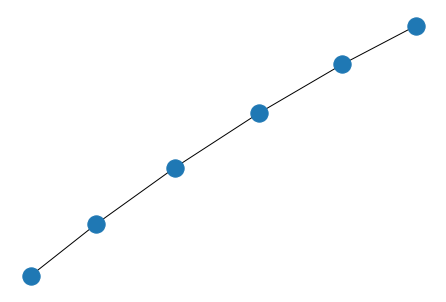

In [69]:
t = nx.random_tree(n)
while nx.is_isomorphic(t, orbits[0][0]):
    t = nx.random_tree(n)

nx.draw(t)

orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

sum(len(o) for o in orbits)

1530

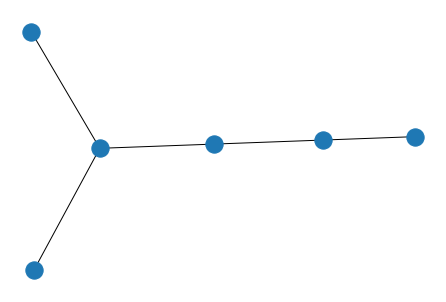

In [70]:
t = nx.random_tree(n)
while nx.is_isomorphic(t, orbits[0][0]):
    t = nx.random_tree(n)

nx.draw(t)

orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

sum(len(o) for o in orbits)

## 4. A Collaborations Network

The **social graph** of a node $x$ in a (social) network
is the **induced subgraph** on the set of friends of $x$
(that is the graph which has (only) the friends of $x$
as its vertices, and between them all the edges from the
original network).
The **clustering coefficient** of $x$ is the density
$m \, \binom{n}{2}^{-1}$
of the social graph of $x$, the proportion of its actual number of edges,
$m$, in the set of potential edges, of size $\binom{n}{2} = \frac12 n(n-1)$,
where $n$ is its number of vertices.

[MathSciNet](http://www.ams.org/mathscinet) describes 
the social network of mathematical researchers defined
by collaboration.

1. **Pick** a (local) mathematician with at least $10$
friends (i.e., co-authors), determine their social graph.

2. Hence compute their clustering coefficient.

(**Note** that access to these data is free, but only **on campus**.)
